In [127]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics


In [128]:
## réalisation de l'ACP



In [129]:
enedis = pd.read_csv("/Users/jeremiedarracq/Stat-app/enedis.csv",sep=";")



In [130]:
## On récupère la date
enedis["date"]=enedis["Horodate"].apply(lambda x : x[0:10])
## On récupère les données de température régionales
meteo_reg =pd.read_csv("/Users/jeremiedarracq/Stat-app/temperature_reg.csv",sep=";")
## On récupères les indices socios régionaux
socio=pd.read_csv("/Users/jeremiedarracq/Stat-app//data.csv",sep=";",header=2)
socio["Code"]=socio["Code"].astype("str")
socio.drop(socio[ (socio['Code'] == "1") | (socio['Code'] == "2") | (socio['Code'] == "3") | (socio['Code'] == "4") | (socio['Code'] == "6")].index, inplace=True)
socio["Code"]=pd.to_numeric(socio["Code"])
## On fusionne indice socio et consommations électrique 
enedis_socio=pd.merge(enedis,socio,how='left',left_on="Code région",right_on="Code")
enedis_socio
meteo_reg
enedis

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),date
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,48,1727.0,97,0,1,2022-09-30
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,8,322.0,16,0,1,2022-09-30
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,11,742.0,22,0,1,2022-09-30
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,13,579.0,26,0,1,2022-09-30
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,16,334.0,33,0,1,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874994,2022-06-19T18:30:00+02:00,Bretagne,53,PRO1 (+ PRO1WE),P7: ]18-24] kVA,5742,4196121.0,715.0,13,497.0,14,603.0,27,0,1,2022-06-19
4874995,2022-06-19T18:30:00+02:00,Bretagne,53,PRO1 (+ PRO1WE),P9: ]30-36] kVA,12137,13049064.0,1082.0,14,597.0,15,834.0,29,0,1,2022-06-19
4874996,2022-06-19T18:30:00+02:00,Bretagne,53,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,11245,10172680.0,1113.0,14,801.0,14,956.0,29,0,1,2022-06-19
4874997,2022-06-19T18:30:00+02:00,Bretagne,53,PRO3,P5: ]12-15] kVA,31,NaN,NaN,S,NaN,S,NaN,S,0,1,2022-06-19


In [131]:
enedis_final=pd.merge(enedis_socio,meteo_reg,how='left',left_on=["date","Code région"],right_on=["date","code_insee_region"])
enedis_final

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),...,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,id,code_insee_region,region,tmin,tmax,tmoy
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,...,19.8,16.2,9.4,11.4,2022-09-30T00:00:00-84,84.0,Auvergne-Rhône-Alpes,6.21,14.74,10.47
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,...,19.8,16.2,9.4,11.4,2022-09-30T00:00:00-84,84.0,Auvergne-Rhône-Alpes,6.21,14.74,10.47
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,...,19.8,16.2,9.4,11.4,2022-09-30T00:00:00-84,84.0,Auvergne-Rhône-Alpes,6.21,14.74,10.47
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,...,19.8,16.2,9.4,11.4,2022-09-30T00:00:00-84,84.0,Auvergne-Rhône-Alpes,6.21,14.74,10.47
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,...,19.8,16.2,9.4,11.4,2022-09-30T00:00:00-84,84.0,Auvergne-Rhône-Alpes,6.21,14.74,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874994,2022-06-19T18:30:00+02:00,Bretagne,53,PRO1 (+ PRO1WE),P7: ]18-24] kVA,5742,4196121.0,715.0,13,497.0,...,20.1,18.1,10.5,11.4,2022-06-19T00:00:00-53,53.0,Bretagne,12.80,18.40,15.60
4874995,2022-06-19T18:30:00+02:00,Bretagne,53,PRO1 (+ PRO1WE),P9: ]30-36] kVA,12137,13049064.0,1082.0,14,597.0,...,20.1,18.1,10.5,11.4,2022-06-19T00:00:00-53,53.0,Bretagne,12.80,18.40,15.60
4874996,2022-06-19T18:30:00+02:00,Bretagne,53,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,11245,10172680.0,1113.0,14,801.0,...,20.1,18.1,10.5,11.4,2022-06-19T00:00:00-53,53.0,Bretagne,12.80,18.40,15.60
4874997,2022-06-19T18:30:00+02:00,Bretagne,53,PRO3,P5: ]12-15] kVA,31,NaN,NaN,S,NaN,...,20.1,18.1,10.5,11.4,2022-06-19T00:00:00-53,53.0,Bretagne,12.80,18.40,15.60


In [132]:
enedis_stat_desc = enedis_final.drop(columns=["Code région","Plage de puissance souscrite","Courbe Moyenne n°1 (Wh)","Indice représentativité Courbe n°1 (%)","Courbe Moyenne n°2 (Wh)","code_insee_region","id","Indice représentativité Courbe n°2 (%)","Courbe Moyenne n°1 + n°2 (Wh)","Indice représentativité Courbe n°1 + n°2 (%)","Jour max du mois (0/1)","Semaine max du mois (0/1)","date","Code","Libellé","region","tmin","tmax","Population au dernier recensement 2018",'Part des "agriculteurs exploitants" dans la population 2018','Part des "employés" dans la population 2018',"Part des 30-44 ans 2018","Part des 45-59 ans 2018","Part des 60-74 ans 2018",'Part des "autres sans activité professionnelle" dans la population 2018','Part des "autres sans activité professionnelle" dans la population 2018.1','Part des "cadres et professions intellectuelles supérieures" dans la population 2018','Part des "ouvriers" dans la population 2018','Part des "professions intermédiaires" dans la population 2018'])
enedis_stat_desc



,Horodate,Région,Profil,Nb points soutirage,Total énergie soutirée (Wh),"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""retraités"" dans la population 2018",Médiane du revenu disponible par UC 2018,Part des 15-29 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,tmoy
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,ENT3 (+ ENT4 + ENT5),1376,2095739.0,3.9,27.0,22480.0,17.6,9.4,11.4,10.47
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,PRO1 (+ PRO1WE),52691,12376840.0,3.9,27.0,22480.0,17.6,9.4,11.4,10.47
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,PRO1 (+ PRO1WE),8350,6545703.0,3.9,27.0,22480.0,17.6,9.4,11.4,10.47
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,PRO2 (+ PRO2WE + PRO6),19759,7072016.0,3.9,27.0,22480.0,17.6,9.4,11.4,10.47
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,PRO5,55645,18921676.0,3.9,27.0,22480.0,17.6,9.4,11.4,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...
4874994,2022-06-19T18:30:00+02:00,Bretagne,PRO1 (+ PRO1WE),5742,4196121.0,3.5,31.2,21750.0,16.4,10.5,11.4,15.60
4874995,2022-06-19T18:30:00+02:00,Bretagne,PRO1 (+ PRO1WE),12137,13049064.0,3.5,31.2,21750.0,16.4,10.5,11.4,15.60
4874996,2022-06-19T18:30:00+02:00,Bretagne,PRO2 (+ PRO2WE + PRO6),11245,10172680.0,3.5,31.2,21750.0,16.4,10.5,11.4,15.60
4874997,2022-06-19T18:30:00+02:00,Bretagne,PRO3,31,NaN,3.5,31.2,21750.0,16.4,10.5,11.4,15.60


<AxesSubplot:>

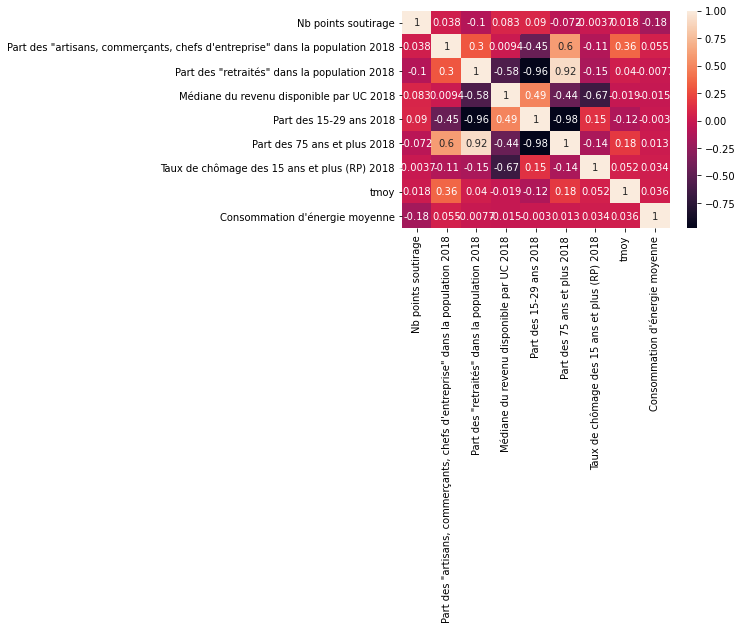

In [133]:
## Modèle de Régression linéaire

## On se concentre sur l'IDF 

enedis_reg = enedis_stat_desc.drop(columns = ["Horodate", "Région","Profil","Total énergie soutirée (Wh)"])
enedis_reg["Consommation d'énergie moyenne"] = enedis_final["Total énergie soutirée (Wh)"]/enedis_final["Nb points soutirage"]

enedis_reg_na= enedis_reg.dropna()


matrice_corr = enedis_reg_na.corr()
sns.heatmap(data=matrice_corr, annot=True)

## On enlèvre les colonnes non numériques

##plt.plot(enedis_idf_Profil.Horodate,(enedis_idf_Profil["Total énergie soutirée (Wh)"])/1000)




In [134]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(enedis_reg_na["Médiane du revenu disponible par UC 2018"],enedis_reg_na["Consommation d'énergie moyenne"], test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))


##Y_train_predict = lmodellineaire.predict(X_test)

##plt.plot(X_test,Y_train_predict)


(3478520,)
(869631,)
(3478520,)
(869631,)


LinearRegression()

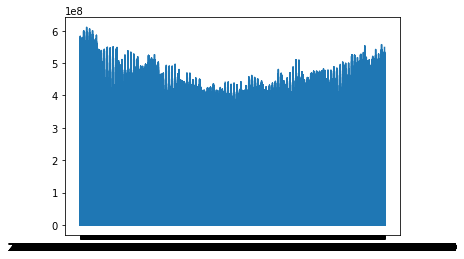

In [135]:
## Régions ile de france 

enedis_idf = enedis_stat_desc[enedis_stat_desc.Région=="Île-de-France"]
enedis_idf
plt.plot(enedis_idf.Horodate,enedis_idf["Total énergie soutirée (Wh)"])

In [136]:
##enedis_idf_Profil

: 